<a href="https://colab.research.google.com/github/VMarcell/SYSCODE_webapp/blob/main/hazi_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feladat kiírás
Ebben a feladatban borokat osztályainak a megállapítására kell egy klasszifikációs (most SVM-et) train-elni.

In [ ]:
import pandas as pd
import numpy as np

# Harmadik féltől származó könyvtárak
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC

# 1. feladat
Olvassuk be az adatokat. A beolvasáshoz használd a következő url-t: "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"  
  
### AZ URL SEGÍTSÉGÉVEL OLVASD BE, NE TÖLTSD LE!
  
Az csv oszlopai:   
column_names = ["class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines", "proline"]


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines", "proline"]
data = pd.read_csv(url, names=column_names)

# 2. Hiányzó adatok kezelése
Ellenőrizd, hogy vannak-e hiányzó értékek az adathalmazban. Az esetleges hiányzó értékeket cseréld le az adott oszlop átlagértékére.

In [ ]:
print(data.isnull().sum())

for column in data.columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].mean(), inplace=True)

print(data.isnull().sum())

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64
class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64


# 3. feladat
Készíts egy korrelációs analízist majd jelenítsd meg őket egy plot-on.

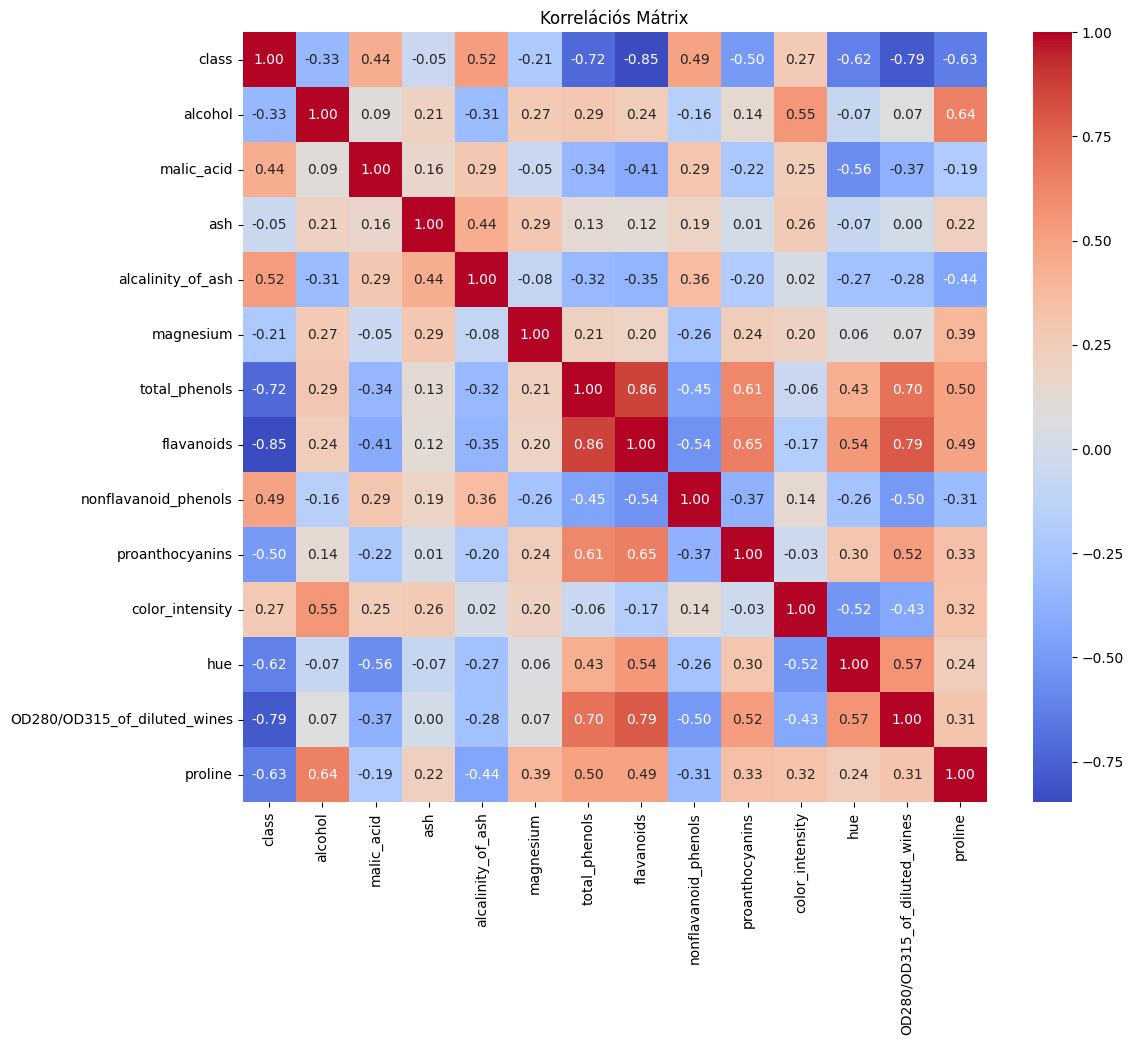

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelációs Mátrix')
plt.show()

# 4. feladat
Készítsd el a következő ábrákat:
- Alkoholtartalom szerinti histogramm
- Eloszlási diagram (scatter plot) az alkoholtartalom és a magnéziumtartalom között
- Pie chartot a borok osztálya szerint

Címkézd is fel őket. A tengelyekre írd rá a métrékegységet és mindegyik ábrának legyen címe, hogy mit látunk rajta.

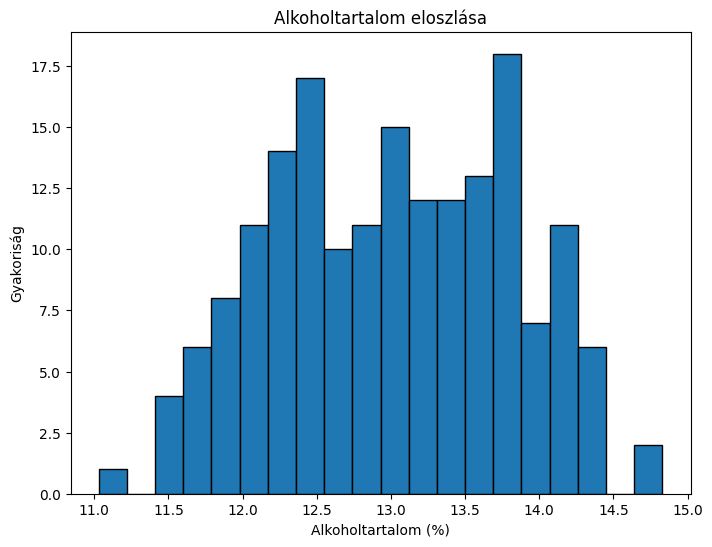

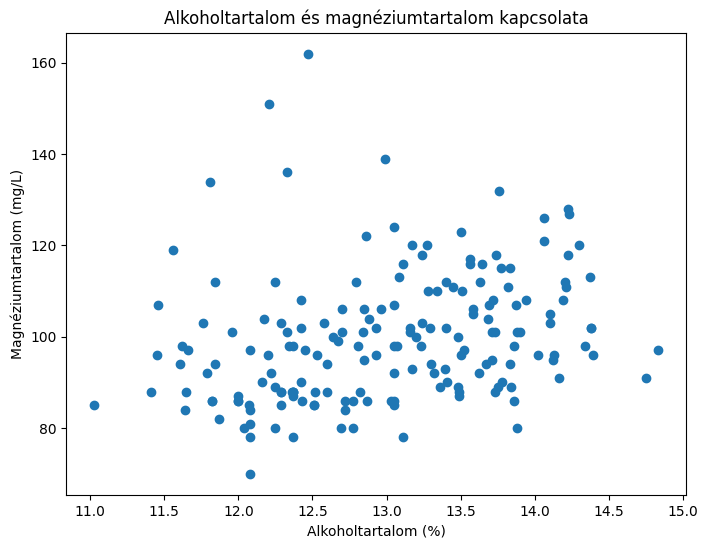

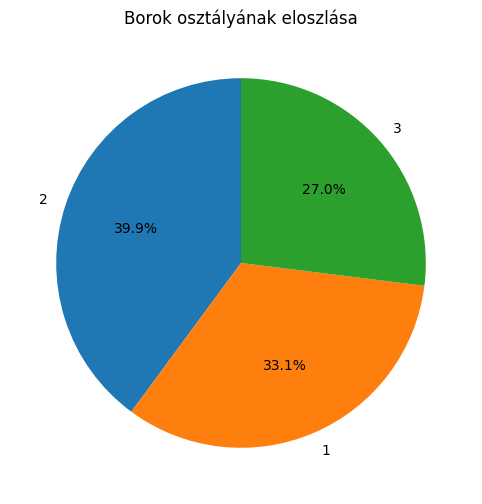

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['alcohol'], bins=20, edgecolor='black')
plt.xlabel('Alkoholtartalom (%)')
plt.ylabel('Gyakoriság')
plt.title('Alkoholtartalom eloszlása')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['alcohol'], data['magnesium'])
plt.xlabel('Alkoholtartalom (%)')
plt.ylabel('Magnéziumtartalom (mg/L)')
plt.title('Alkoholtartalom és magnéziumtartalom kapcsolata')
plt.show()

class_counts = data['class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Borok osztályának eloszlása')
plt.show()

# 5. feladat
Készítsd egy osztályt a normalizáláshoz és normalizáld vele a dataframe-et.

In [ ]:
class Normalizer:
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit_transform(self, df):
        """
        Illeszti a normalizálót a dataframe-re és normalizálja az adatokat.

        Args:
            df: Pandas dataframe.

        Returns:
            A normalizált dataframe.
        """
        numerical_features = df.select_dtypes(include=np.number).columns
        df[numerical_features] = self.scaler.fit_transform(df[numerical_features])
        return df

normalizer = Normalizer()
normalized_data = normalizer.fit_transform(data)
print(normalized_data)

     class   alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0      0.0  0.842105    0.191700  0.572193           0.257732   0.619565   
1      0.0  0.571053    0.205534  0.417112           0.030928   0.326087   
2      0.0  0.560526    0.320158  0.700535           0.412371   0.336957   
3      0.0  0.878947    0.239130  0.609626           0.319588   0.467391   
4      0.0  0.581579    0.365613  0.807487           0.536082   0.521739   
..     ...       ...         ...       ...                ...        ...   
173    1.0  0.705263    0.970356  0.582888           0.510309   0.271739   
174    1.0  0.623684    0.626482  0.598930           0.639175   0.347826   
175    1.0  0.589474    0.699605  0.481283           0.484536   0.543478   
176    1.0  0.563158    0.365613  0.540107           0.484536   0.543478   
177    1.0  0.815789    0.664032  0.737968           0.716495   0.282609   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.62

# 6. feladat
Készítsd elő az adatot tanításhoz. Bontsd szét az adott adathalmazt tanító és validáló részre.

In [ ]:
from sklearn.model_selection import train_test_split

X = normalized_data.drop(columns=["class"])
y = normalized_data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train és Test halmazok létrehozva!")

Train és Test halmazok létrehozva!


# 7. feladt
Taníts fel egy modelt grid search segítségével. Adj meg tetszőleges számú paramétereket. A végén pedig írd ki a legjobb modell paramétereit és pontosságát. Validáld a teszt halmazon.  
Ne csak eggyel pls...  
  
Ha sok a felesleges kiírás, akkor használhatod a következő sorokat ezek eltüntetéséhez:  
import warnings  
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

y_train = y_train.astype(int)
y_test = y_test.astype(int)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svc = SVC()

grid = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print("Legjobb paraméterek:", grid.best_params_)
print("Legjobb cross-validation pontosság: {:.2f}%".format(grid.best_score_ * 100))

test_accuracy = grid.score(X_test, y_test)
print("Teszt halmaz pontossága: {:.2f}%".format(test_accuracy * 100))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Legjobb paraméterek: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Legjobb cross-validation pontosság: 99.29%
Teszt halmaz pontossága: 100.00%
